In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#dataset_i = pd.read_csv(r"C:\Users\vanch\Downloads\airline-passengers.csv")
dataset = pd.read_csv(r"C:\Users\vanch\Downloads\airline-passengers.csv", usecols=[1])
#dataset_i.head()
#dataset = dataset_i["Passengers"]

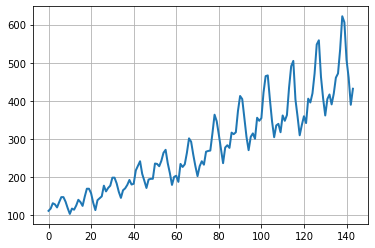

In [2]:
plt.plot(dataset, linewidth =2)
plt.grid()
plt.show()

In [3]:
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed(7)

In [4]:
dataset = dataset.values



In [5]:
dataset = dataset.astype('float32')

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [8]:
train_size = int(len(dataset)*0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train),len(test))

100 44


In [12]:
# Convert an array of values to dataset matrix

def create_dataset(dataset, look_back = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - look_back -1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)


In [14]:
X,Y = create_dataset(dataset)

In [19]:
print((X[i],Y[i]) for i in range(len(X)))

<generator object <genexpr> at 0x0000021407CF58C8>


In [20]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
# Reshape into [sample, time_step, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0], 1, testX.shape[1]))

In [25]:
trainX.shape

(98, 1, 1)

In [26]:
#creating LSTM

model = Sequential()
model.add(LSTM(4, input_shape= (1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
hist = model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose =2)

Epoch 1/100
98/98 - 19s - loss: 0.0324
Epoch 2/100
98/98 - 0s - loss: 0.0150
Epoch 3/100
98/98 - 0s - loss: 0.0114
Epoch 4/100
98/98 - 0s - loss: 0.0105
Epoch 5/100
98/98 - 0s - loss: 0.0096
Epoch 6/100
98/98 - 0s - loss: 0.0086
Epoch 7/100
98/98 - 0s - loss: 0.0079
Epoch 8/100
98/98 - 0s - loss: 0.0069
Epoch 9/100
98/98 - 0s - loss: 0.0060
Epoch 10/100
98/98 - 0s - loss: 0.0052
Epoch 11/100
98/98 - 0s - loss: 0.0044
Epoch 12/100
98/98 - 0s - loss: 0.0039
Epoch 13/100
98/98 - 0s - loss: 0.0033
Epoch 14/100
98/98 - 0s - loss: 0.0030
Epoch 15/100
98/98 - 0s - loss: 0.0027
Epoch 16/100
98/98 - 0s - loss: 0.0025
Epoch 17/100
98/98 - 0s - loss: 0.0023
Epoch 18/100
98/98 - 0s - loss: 0.0022
Epoch 19/100
98/98 - 0s - loss: 0.0022
Epoch 20/100
98/98 - 0s - loss: 0.0022
Epoch 21/100
98/98 - 0s - loss: 0.0021
Epoch 22/100
98/98 - 0s - loss: 0.0021
Epoch 23/100
98/98 - 0s - loss: 0.0021
Epoch 24/100
98/98 - 0s - loss: 0.0022
Epoch 25/100
98/98 - 0s - loss: 0.0021
Epoch 26/100
98/98 - 0s - loss: 0

In [27]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



In [33]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.25 RMSE
Test Score: 50.28 RMSE


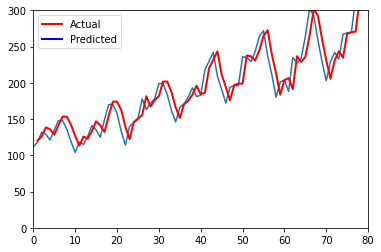

In [44]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, lw =2,color = 'red', label = "Actual")
plt.plot(testPredictPlot, lw =2, color = 'blue', label = "Predicted")
plt.xlim([0,80])
plt.ylim([0,300])
plt.legend()
plt.show()